In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_data.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [4]:
#Note data is in string format> convert to datetype
# from object to datatime

In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [8]:
# Exploration Summary

# We have a dataframe consisting of 9827 rows and 9 columns.

# our dataset looks a bit tidy with no nulls nor duplicated values.

# Release_Date column need to be casted into date time and to extract only the year value.

# Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.

# there is noticeable outliers in Popularity column

# Vote_Average better be categorized for proper analysis.

# Genre column has some separated values and white spaces that needs to be handled and casted into one category.

# Data preprocessing

In [9]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [11]:
# yes it changes , assigmnet done
# now let have only > year 

In [12]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [13]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9822,1973,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9823,2020,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9824,2016,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9825,2021,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [14]:
# assingment 2 done > dd/mm/yyyy > yyyy only


# Droping cols > Overview, Original_Langauges, Poster_Url


In [15]:
cols = ['Overview', 'Original_Language', 'Poster_Url'] Poster_Url

In [42]:
df.drop(cols, axis = 1 , inplace = True)

In [43]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [44]:
df.head()
#dassingmnet 4 done.]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
# assignment 4. vote_average to sign string values based on the numbers as grading
# excellent > good > average>  bad
       

In [45]:
def assing_cols(df, cols, labels):
    edges = [
        df[cols].describe()['min'],
        df[cols].describe()['25%'],
        df[cols].describe()['50%'],
        df[cols].describe()['75%'],
        df[cols].describe()['max']
    ]
    df[cols] = pd.cut(df[cols], edges, labels=labels, duplicates='drop')
    return df


In [46]:
labels = [
    'Bad',
    'Good',
    'Average',
    'Popular'
]

In [47]:
labels

['Bad', 'Good', 'Average', 'Popular']

In [48]:
assing_cols(df, 'Vote_Average', labels)

KeyError: 'min'

In [49]:
df['Vote_Average'].unique()

['Popular', 'Good', 'Average', 'Bad']
Categories (4, object): ['Bad' < 'Good' < 'Average' < 'Popular']

In [50]:
# assingment 4 done 
# df.head()

In [33]:
df['Vote_Average'].value_counts().sort_values()

Vote_Average
Good       2398
Average    2412
Popular    2450
Bad        2467
Name: count, dtype: int64

In [35]:
# dupilicate and null values 
df.dropna(inplace= True)
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [51]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [ ]:
# assingment 5, break genre by one blow one below ,and split in list( show as list)


In [54]:
df['Genre'] =df['Genre'].str.split(', ')
df  = df.explode('Genre').reset_index(drop =  True)

In [57]:
df.head()

# assignment done 5

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [58]:
# assingnment 6 , Genre have to change to category > or casting col to category

In [63]:
# Convert 'Genre' column to category type
df['Genre'] = df['Genre'].astype('category')

# Check the data type of the 'Genre' column
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [64]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [66]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

#  Data visualization

In [67]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [68]:
sns.set_style('whitegrid')

In [69]:
# what is the most frequest genre of movies released on netflix?

In [70]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

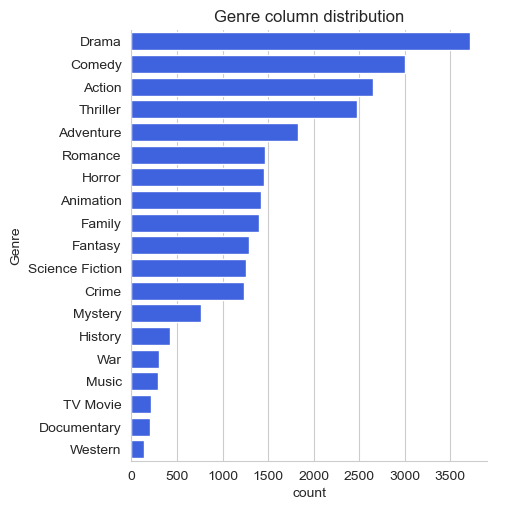

In [75]:
sns.catplot( y = 'Genre', 
            data = df, 
            kind  = 'count', 
            order = df['Genre'].value_counts().index,  
            color = '#2453f9')
plt.title('Genre column distribution')

plt.show()

In [76]:
# lets find the highest votes in the votes average column?

In [77]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


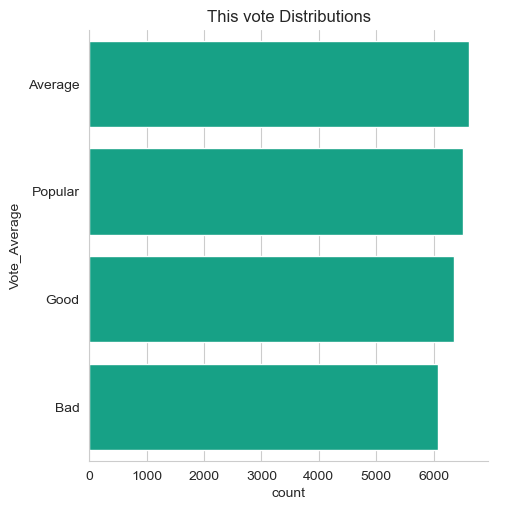

In [89]:
sns.catplot(y = 'Vote_Average', 
           data = df,
           kind = 'count',
           order = df['Vote_Average'].value_counts().index,
           color = '#00b894'
           )
plt.title('This vote Distributions')
plt.show()

In [90]:
 # What movies got the  highest popularity? what's its genre?

In [91]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [92]:
df[df['Popularity'] ==  df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


In [93]:
# which moveis it lowest proularity

In [94]:
df[df['Popularity'] ==  df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


In [95]:
# year has the most released movies

Text(0.5, 1.0, 'Release Data Column Distributions')

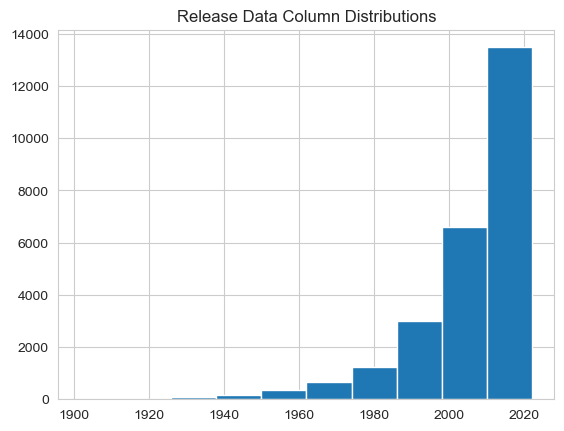

In [99]:
df['Release_Date'].hist()
plt.title('Release Data Column Distributions')

# Summary of the project of netflix data. 

In [ ]:
# Drama is the most common kind of movie. It shows up a lot, more than fourteen out of every hundred movies.

# Lots of people voted for their favorite movies. There are six thousand five hundred eighty movies with votes. Drama wins again. It is the most liked.

# The most popular movie is Spider Man No Way Home. It has action, adventure, and cool science stuff.

# The least popular movie has a mix of music, drama, war, science fiction, and something called hit. That is a lot of things.

# The year with the most movies made is twenty twenty. So many movies came out that year.